In [ ]:
# Install packages from requirements.txt

#%pip install -r requirements.txt

# imports

In [1]:
# Set the working directory and adjust the Python path
import os
import sys
import numpy as np
from time import time

# Set the working directory to the src directory
os.chdir('./')
sys.path.append(os.getcwd())

from configuration.algorithm_settings import settings
from scripts.utils.generators import *
from scripts.utils.graph_visualizer import draw_graph
from scripts.utils.toy_city_generators import *

from collections import Counter

from scripts.utils.roulette_selection import roulette_wheel_selection

import pprint
from scripts.utils.route_finder import dijkstra
import copy


# get graph map

In [2]:
size=20
fixed_weight=1

map_graph = generate_square_city_graph(size, fixed_weight)

In [3]:
buses_graph = generate_bus_line_square_city(size, fixed_weight)
map_graph_walking = map_graph
full_graph = merge_bus_and_map_graph(copy.deepcopy(map_graph),buses_graph)

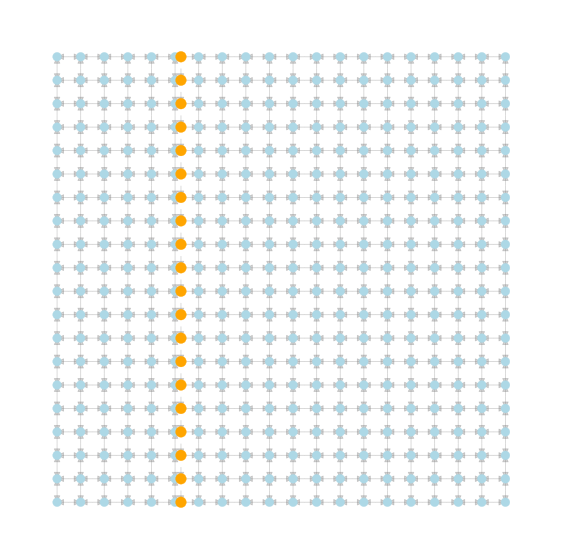

In [4]:
draw_graph(full_graph)

# run ACO algorithms

### configuration setup

In [5]:
from scripts.ant_colony_simple_ACO.ant_colony_optimization import ACO
from scripts.ant_colony_system.ant_colony_system import ACS
from scripts.ant_best_worst.ant_colony_best_worst import ABW
from scripts.ant_max_min.ant_colony_MAXMIN import ACS_MAXMIN

start_node = 1
end_node = 397
num_ants = 50
evaporation_rate = 0.3
initial_pheromone_lvl = 0.5
heuristic_weight = 0.7
pheromone_weight = 0.4

epomax = 500
local_evap_rate = 0.1
transition_prob = 0.2


### DIKjSTRA comparison

In [6]:
def _route_cost(graph, path):
    total = 0.0
    for a,b in zip(path, path[1:]):
        idx = graph['connections'][a].index(b)
        total += graph['weights'][a][idx]
    return total

route_full = dijkstra(full_graph, start_node, end_node)
route_walk = dijkstra(map_graph_walking, start_node, end_node)
print('Dijkstra full (bus+walk):', route_full)
print('Cost:', _route_cost(full_graph, route_full))
print('Dijkstra walk only:', route_walk)
print('Cost:', _route_cost(map_graph_walking, route_walk))

Dijkstra full (bus+walk): [1, 2, 3, 4, 5, 100005, 100025, 100045, 100065, 100085, 100105, 100125, 100145, 100165, 100185, 100205, 100225, 100245, 100265, 100285, 100305, 100325, 100345, 100365, 100385, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]
Cost: 23.110000000000007
Dijkstra walk only: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 37, 57, 77, 97, 117, 137, 157, 177, 197, 217, 237, 257, 277, 297, 317, 337, 357, 377, 397]
Cost: 35.0


### Ant Colony Simple (ACO)

In [7]:
solution_ACO_path,cost_ACO,time_ACO,epochs_ACO = ACO(full_graph, start_node, end_node, num_ants, evaporation_rate, initial_pheromone_lvl, heuristic_weight, pheromone_weight, epomax)

print("results for ant_colony_simple (ACO)")
print(solution_ACO_path)
print("cost: ", cost_ACO)
print("time spent for a solution: ", time_ACO)
print("epochs: ", epochs_ACO)


results for ant_colony_simple (ACO)
[1, 2, 3, 4, 5, 100005, 100025, 100045, 100065, 100085, 100105, 100125, 100145, 100165, 100185, 100205, 100225, 100245, 100265, 100285, 100305, 100325, 100345, 100365, 100385, 385, 386, 387, 388, 389, 390, 391, 392, 372, 373, 393, 394, 395, 375, 376, 377, 397]
cost:  27.110000000000007
time spent for a solution:  75.37922143936157
epochs:  500


### Ant colony System (ACS)

In [8]:
solution_ACS_path,cost_ACS,time_ACS,epochs_ACS = ACS(full_graph, start_node, end_node, num_ants, evaporation_rate, local_evap_rate, transition_prob, initial_pheromone_lvl, heuristic_weight, pheromone_weight, epomax)

print("results for ant_colony_system (ACS)")
print(solution_ACS_path)
print("cost: ", cost_ACS)
print("time spent for a solution: ", time_ACS)
print("epochs: ", epochs_ACS)


results for ant_colony_system (ACS)
[1, 2, 3, 4, 5, 100005, 100025, 100045, 100065, 100085, 100105, 100125, 125, 145, 146, 166, 167, 168, 188, 208, 228, 248, 268, 269, 289, 290, 291, 311, 312, 332, 333, 334, 354, 374, 394, 395, 396, 397]
cost:  32.21
time spent for a solution:  80.6206681728363
epochs:  500


### Best-Worst Ant Colony

In [9]:
solution_ABW_path,cost_ABW,time_ABW,epochs_ABW = ABW(full_graph, start_node, end_node, num_ants, evaporation_rate, epomax, initial_pheromone_lvl, heuristic_weight, pheromone_weight)

print("results for ant_colony_best_worst (ABW)")
print(solution_ABW_path)
print("cost: ", cost_ABW)
print("time spent for a solution: ", time_ABW)
print("epochs: ", epochs_ABW)

results for ant_colony_best_worst (ABW)
[1, 21, 22, 23, 3, 4, 5, 100005, 100025, 100045, 100065, 65, 66, 67, 87, 86, 85, 100085, 100105, 100125, 125, 105, 106, 107, 127, 128, 129, 149, 169, 168, 188, 189, 190, 210, 230, 250, 249, 229, 228, 248, 247, 246, 266, 265, 100265, 100285, 100305, 305, 304, 284, 264, 263, 283, 303, 323, 324, 344, 364, 384, 385, 386, 387, 388, 389, 369, 349, 350, 370, 390, 391, 392, 393, 373, 372, 371, 351, 352, 353, 354, 355, 375, 395, 396, 397]
cost:  76.32999999999998
time spent for a solution:  68.74626922607422
epochs:  500


### Max-Min Ant Colony System

In [10]:
solution_ACS_MAXMIN_path,cost_ACS_MAXMIN,time_ACS_MAXMIN,epochs_ACS_MAXMIN = ACS_MAXMIN(full_graph, start_node, end_node, num_ants, evaporation_rate, transition_prob, epomax, initial_pheromone_lvl, heuristic_weight, pheromone_weight)

print("results for ant_colony_MAXMIN (ACS_MAXMIN)")
print(solution_ACS_MAXMIN_path)
print("cost: ",cost_ACS_MAXMIN)
print("time spent for a solution: ", time_ACS_MAXMIN)
print("epochs: ", epochs_ACS_MAXMIN)

KeyboardInterrupt: 